In [2]:
!pip install wordcloud


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 262.6 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 465.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 476.3 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/299.9 kB 479.3 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/299.9 kB 566.5 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/299.9 kB 523.5 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/299.9 kB 523.5 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/299.9 kB 471.4 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/299.9 kB 474.7 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/299.9 kB 476.3 kB

In [3]:
# Importing necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

# Importing libraries necessary for Model Building and Training
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anu54\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
data = pd.read_csv('spam.csv')
data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.shape


(5572, 2)

In [7]:
print(data.columns)


Index(['Category', 'Message'], dtype='object')


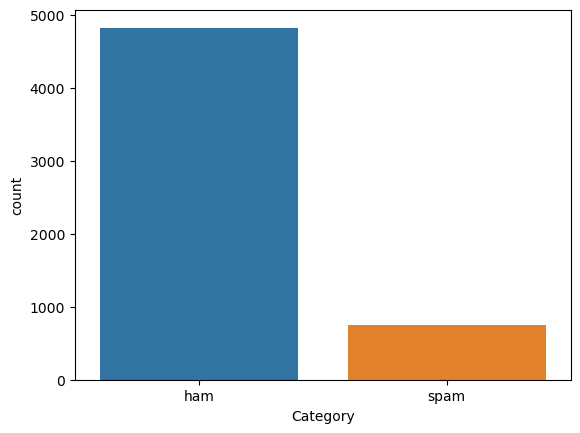

In [9]:
sns.countplot(x='Category', data=data)
plt.show()


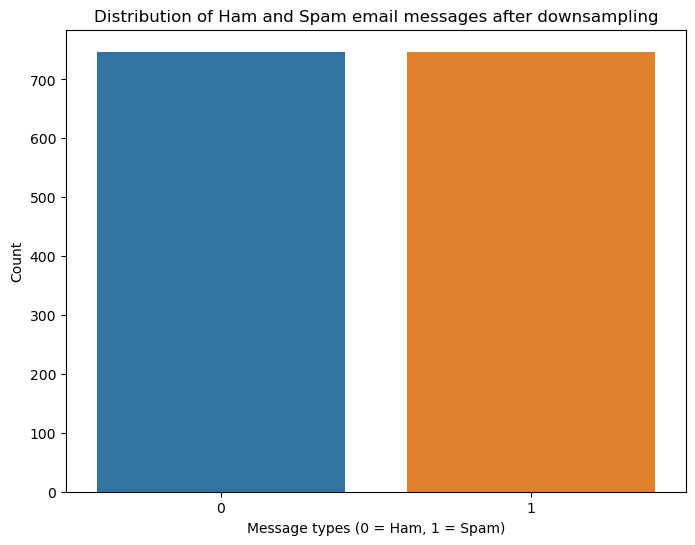

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Downsampling to balance the dataset
ham_msg = data[data['Category'] == 'ham']
spam_msg = data[data['Category'] == 'spam']

# Downsample the 'ham' messages to match the count of 'spam' messages
ham_msg = ham_msg.sample(n=len(spam_msg), random_state=42)

# Combine the datasets to create a balanced dataset
balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)

# Add a numerical column for plotting
balanced_data['spam'] = balanced_data['Category'].apply(lambda x: 1 if x == 'spam' else 0)

# Plotting the counts of the downsampled dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_data, x='spam')
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.show()


In [15]:
# Removing the word 'Subject' from the 'Message' column
balanced_data['Message'] = balanced_data['Message'].str.replace('Subject', '', regex=False)

# Display the first few rows of the modified dataset
balanced_data.head()


,Category,Message,spam
0,ham,If i not meeting ü all rite then i'll go home ...,0
1,ham,"I.ll always be there, even if its just in spir...",0
2,ham,"Sorry that took so long, omw now",0
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...,0
4,ham,Dunno i juz askin cos i got a card got 20% off...,0


In [17]:
import string

# List of punctuations
punctuations_list = string.punctuation

# Function to remove punctuations
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

# Apply the function to the 'Message' column
balanced_data['Message'] = balanced_data['Message'].apply(lambda x: remove_punctuations(x))

# Display the first few rows of the modified dataset
balanced_data.head()


,Category,Message,spam
0,ham,If i not meeting ü all rite then ill go home l...,0
1,ham,Ill always be there even if its just in spirit...,0
2,ham,Sorry that took so long omw now,0
3,ham,I thk 50 shd be ok he said plus minus 10 Did ü...,0
4,ham,Dunno i juz askin cos i got a card got 20 off ...,0


In [18]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already done
nltk.download('stopwords')

# Function to remove stopwords
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()
        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)
    return output

# Apply the function to the 'Message' column
balanced_data['Message'] = balanced_data['Message'].apply(lambda text: remove_stopwords(text))

# Display the first few rows of the modified dataset
balanced_data.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anu54\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Message,spam
0,ham,meeting ü rite ill go home lor ü dun feel like...,0
1,ham,ill always even spirit ill get bb soon trying ...,0
2,ham,sorry took long omw,0
3,ham,thk 50 shd ok said plus minus 10 ü leave line ...,0
4,ham,dunno juz askin cos got card got 20 4 salon ca...,0


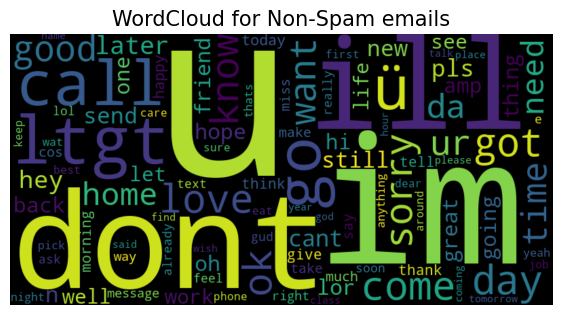

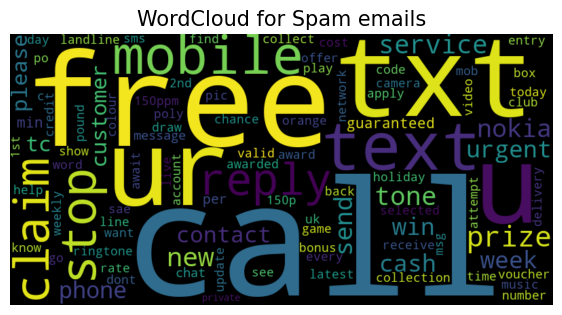

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to plot a word cloud
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['Message'])

    plt.figure(figsize=(7, 7))

    wc = WordCloud(
        background_color='black',
        max_words=100,
        width=800,
        height=400,
        collocations=False
    ).generate(email_corpus)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()

# Plot word clouds for Non-Spam and Spam messages
plot_word_cloud(balanced_data[balanced_data['Category'] == 'ham'], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['Category'] == 'spam'], typ='Spam')


In [20]:
from sklearn.model_selection import train_test_split

# Train-test split
train_X, test_X, train_Y, test_Y = train_test_split(
    balanced_data['Message'],  # Text data
    balanced_data['spam'],     # Labels (0 for ham, 1 for spam)
    test_size=0.2,             # 20% test size
    random_state=42            # Ensures reproducibility
)

# Display the shapes of the split datasets
print(f"Train X shape: {train_X.shape}")
print(f"Test X shape: {test_X.shape}")
print(f"Train Y shape: {train_Y.shape}")
print(f"Test Y shape: {test_Y.shape}")


Train X shape: (1195,)
Test X shape: (299,)
Train Y shape: (1195,)
Test Y shape: (299,)


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

# Pad sequences to have the same length
max_len = 100  # maximum sequence length
train_sequences = pad_sequences(train_sequences,
                                 maxlen=max_len, 
                                 padding='post', 
                                 truncating='post')
test_sequences = pad_sequences(test_sequences, 
                                maxlen=max_len, 
                                padding='post', 
                                truncating='post')

# Display the shape of the padded sequences
print(f"Train sequences shape: {train_sequences.shape}")
print(f"Test sequences shape: {test_sequences.shape}")


Train sequences shape: (1195, 100)
Test sequences shape: (299, 100)


In [29]:
# Train the spam model and save it
def train_spam_model():
    # Load the dataset (replace with your dataset)
    data = pd.read_csv('spam.csv', encoding='latin-1')

    # Preprocessing the data
    data = data[['Message', 'Category']]
    data['spam'] = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)

    # Check class distribution
    print(data['Category'].value_counts())

    # Splitting the data into train and test sets
    X = data['Message']
    y = data['spam']
    train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42)

    # Text vectorization using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    train_X_vec = vectorizer.fit_transform(train_X)
    test_X_vec = vectorizer.transform(test_X)

    # Train a Logistic Regression model with hyperparameter tuning (C=1.0 as an example)
    model = LogisticRegression(C=1.0)
    model.fit(train_X_vec, train_Y)

    # Predict and evaluate the model
    y_pred = model.predict(test_X_vec)
    accuracy = accuracy_score(test_Y, y_pred)
    print(f"Model Accuracy: {accuracy*100:.2f}%")

    # Evaluate with precision, recall, and F1-score
    print("Precision: ", precision_score(test_Y, y_pred))
    print("Recall: ", recall_score(test_Y, y_pred))
    print("F1-score: ", f1_score(test_Y, y_pred))

    # Save the model and vectorizer
    with open('spam_detection_model.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)
    pickle.dump(vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

    return model, vectorizer


In [30]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
			metrics = ['accuracy'],
			optimizer = 'adam')


In [31]:
es = EarlyStopping(patience=3,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)


In [32]:
# Train the model
history = model.fit(train_sequences, train_Y,
					validation_data=(test_sequences, test_Y),
					epochs=20, 
					batch_size=32,
					callbacks = [lr, es]
				)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.4930 - loss: 0.6933 - val_accuracy: 0.4849 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.4947 - loss: 0.6933 - val_accuracy: 0.4849 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.5208 - loss: 0.6932 - val_accuracy: 0.4849 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.5320 - loss: 0.6930 - val_accuracy: 0.4849 - val_loss: 0.6936 - learning_rate: 0.0010


In [27]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4972 - loss: 0.6932
Test Loss : 0.6930487155914307
Test Accuracy : 0.5150501728057861


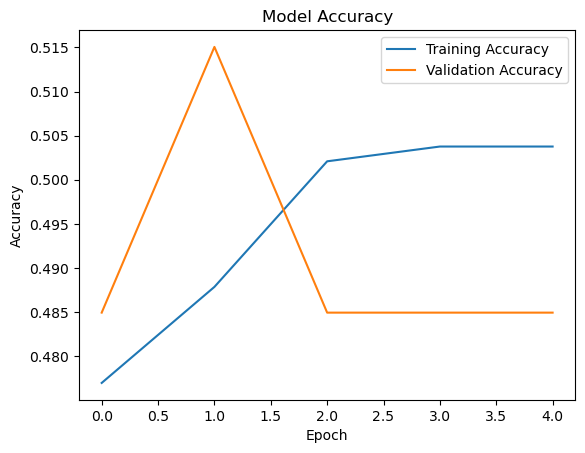

In [28]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
